# Ejercicio: Clasificador de Prendas de Vestir con PyTorch

## Objetivo
Desarrollar un clasificador de imágenes usando PyTorch para identificar diferentes tipos de prendas de vestir utilizando el dataset Fashion-MNIST.

## Dataset
Fashion-MNIST contiene 70,000 imágenes en escala de grises de 28x28 píxeles, divididas en 10 categorías:
- Camiseta/Top
- Pantalón
- Suéter
- Vestido
- Abrigo
- Sandalia
- Camisa
- Zapatilla
- Bolso
- Bota

## Tareas a Realizar

### 1. Preparación de Datos
- Importar las bibliotecas necesarias
- Cargar el dataset Fashion-MNIST
- Implementar las transformaciones necesarias (normalización, aumentación de datos, etc.)
- Crear los dataloaders para entrenamiento y prueba
- Visualizar algunas imágenes de ejemplo del dataset

In [17]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

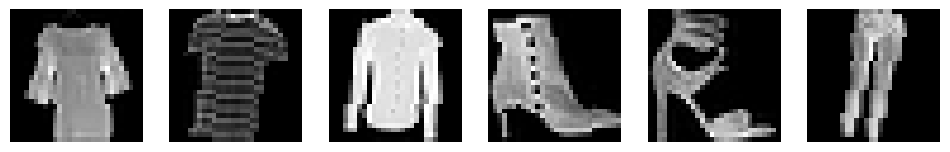

In [13]:
# Definir transformaciones para entrenamiento (incluye aumento de datos)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Volteo horizontal aleatorio
    transforms.RandomRotation(10),  # Rotación aleatoria de ±10 grados
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalización (mean=0.5, std=0.5)
])

# Transformación para prueba (sin aumentación, solo normalización)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Cargar los datasets con sus transformaciones
train_data = dsets.FashionMNIST(root='./dataEjer', train=True, transform=train_transform, download=True)
test_data = dsets.FashionMNIST(root='./dataEjer', train=False, transform=test_transform)

# Crear DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2)

# Función para visualizar imágenes
def show_images(dataloader, num_images=6):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)  # Obtener un lote de imágenes
    images = images[:num_images]  # Seleccionar algunas imágenes

    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        img = images[i].squeeze(0)  # Eliminar dimensión de canal
        img = img * 0.5 + 0.5  # Desnormalizar para visualizar correctamente
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')

    plt.show()

# Mostrar imágenes de ejemplo del dataset de entrenamiento
show_images(train_loader)


### 2. Diseño del Modelo
- Crear una CNN con la siguiente estructura mínima:
  * Al menos 2 capas convolucionales
  * Capas de pooling
  * Capas fully connected
  * Función de activación ReLU
- Implementar técnicas de regularización (dropout, batch normalization, etc.)
- Mover el modelo al dispositivo adecuado (GPU si está disponible)

In [14]:


# Verificar si hay GPU disponible (en este caso usaremos CPU)
device = torch.device("cpu")
print(f"Usando dispositivo: {device}")

# Definir la CNN directamente en el script
class ModeloCNN(nn.Module):
    def __init__(self):
        super(ModeloCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Crear el modelo y moverlo a CPU
modelo = ModeloCNN().to(device)
print(modelo)


Usando dispositivo: cpu
ModeloCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### 3. Entrenamiento
- Definir la función de pérdida y el optimizador
- Implementar el bucle de entrenamiento
- Guardar las métricas durante el entrenamiento (pérdida y precisión)
- Entrenar el modelo durante al menos 10 épocas
- Implementar la validación del modelo

Usando dispositivo: cpu
Época 1/10 -> Pérdida: 0.6182, Precisión: 77.54%
Época 2/10 -> Pérdida: 0.4555, Precisión: 83.28%
Época 3/10 -> Pérdida: 0.4080, Precisión: 85.28%
Época 4/10 -> Pérdida: 0.3750, Precisión: 86.58%
Época 5/10 -> Pérdida: 0.3543, Precisión: 87.34%
Época 6/10 -> Pérdida: 0.3368, Precisión: 87.96%
Época 7/10 -> Pérdida: 0.3220, Precisión: 88.31%
Época 8/10 -> Pérdida: 0.3099, Precisión: 88.72%
Época 9/10 -> Pérdida: 0.3016, Precisión: 89.12%
Época 10/10 -> Pérdida: 0.2937, Precisión: 89.33%
Precisión en test: 91.37%


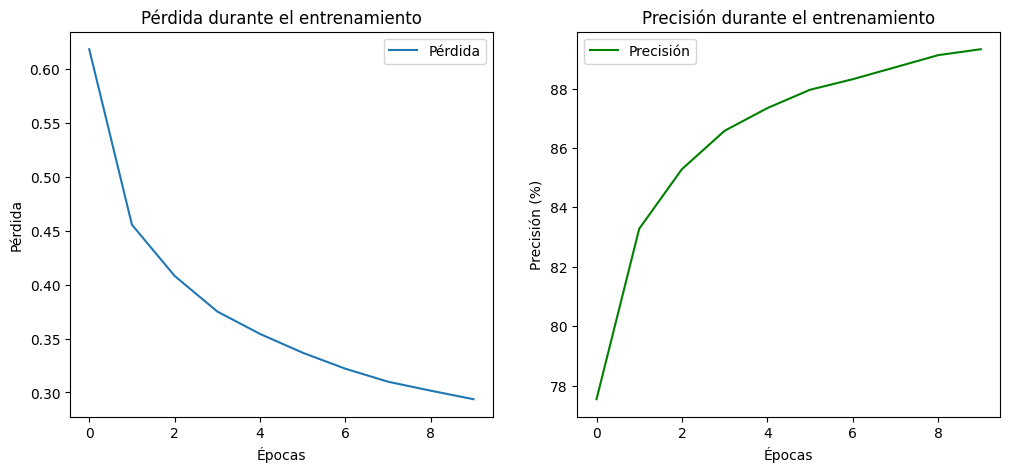

In [15]:
# Verificar si hay GPU disponible (pero usaremos CPU)
device = torch.device("cpu")
print(f"Usando dispositivo: {device}")

# 🔹 1. Definir transformaciones
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 🔹 2. Cargar los datasets
train_data = dsets.FashionMNIST(root='./data', train=True, transform=train_transform, download=True)
test_data = dsets.FashionMNIST(root='./data', train=False, transform=test_transform)

# Crear DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2)

# 🔹 3. Definir la CNN
class ModeloCNN(nn.Module):
    def __init__(self):
        super(ModeloCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 🔹 4. Crear el modelo y moverlo a CPU
modelo = ModeloCNN().to(device)

# 🔹 5. Definir función de pérdida y optimizador
criterio = nn.CrossEntropyLoss()  # Para clasificación multiclase
optimizador = optim.Adam(modelo.parameters(), lr=0.001)

# 🔹 6. Entrenamiento del modelo
num_epocas = 10
historial_perdida = []
historial_precision = []

for epoca in range(num_epocas):
    modelo.train()  # Modo entrenamiento
    perdida_total = 0
    correctos = 0
    total = 0

    for imagenes, etiquetas in train_loader:
        imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)

        # Forward
        salida = modelo(imagenes)
        perdida = criterio(salida, etiquetas)

        # Backward
        optimizador.zero_grad()
        perdida.backward()
        optimizador.step()

        # Guardar métricas
        perdida_total += perdida.item()
        _, predicciones = torch.max(salida, 1)  # Obtener predicción más alta
        correctos += (predicciones == etiquetas).sum().item()
        total += etiquetas.size(0)

    perdida_promedio = perdida_total / len(train_loader)
    precision = 100 * correctos / total

    historial_perdida.append(perdida_promedio)
    historial_precision.append(precision)

    print(f"Época {epoca+1}/{num_epocas} -> Pérdida: {perdida_promedio:.4f}, Precisión: {precision:.2f}%")

# 🔹 7. Evaluación en conjunto de prueba
modelo.eval()  # Modo evaluación
correctos = 0
total = 0

with torch.no_grad():
    for imagenes, etiquetas in test_loader:
        imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)
        salida = modelo(imagenes)
        _, predicciones = torch.max(salida, 1)
        correctos += (predicciones == etiquetas).sum().item()
        total += etiquetas.size(0)

precision_final = 100 * correctos / total
print(f"Precisión en test: {precision_final:.2f}%")

# 🔹 8. Graficar la pérdida y precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(historial_perdida, label="Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Pérdida durante el entrenamiento")

plt.subplot(1, 2, 2)
plt.plot(historial_precision, label="Precisión", color="green")
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.legend()
plt.title("Precisión durante el entrenamiento")

plt.show()


### 4. Evaluación y Visualización
- Evaluar el modelo en el conjunto de prueba
- Crear gráficas de:
  * Pérdida durante el entrenamiento
  * Precisión de entrenamiento vs validación
- Mostrar predicciones en imágenes de prueba
- Calcular y mostrar la matriz de confusión

Precisión en test: 91.37%


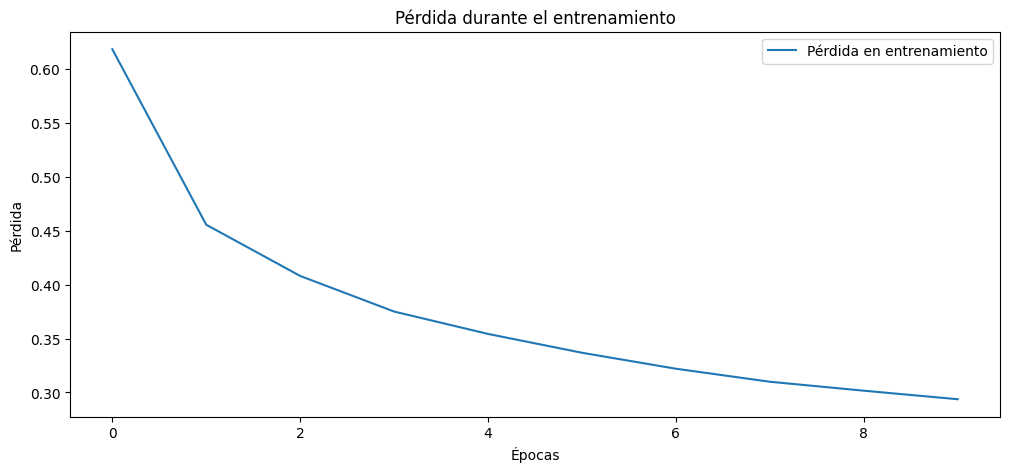

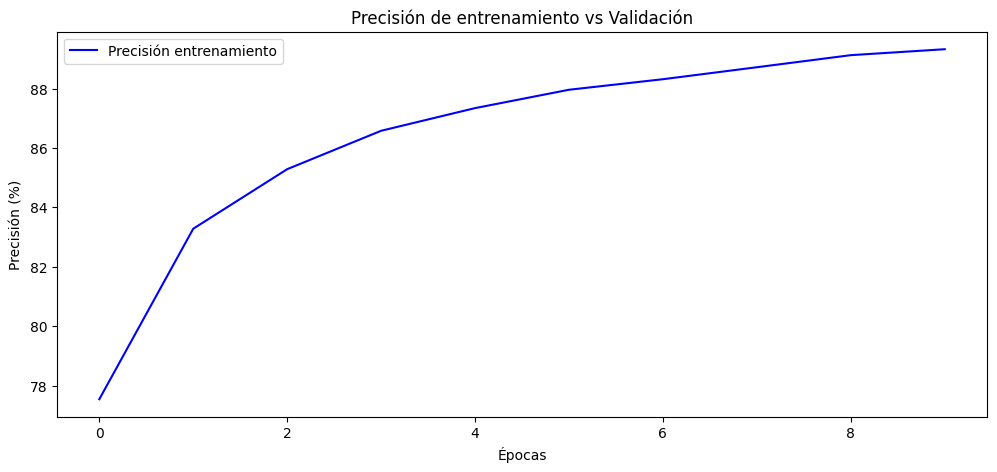

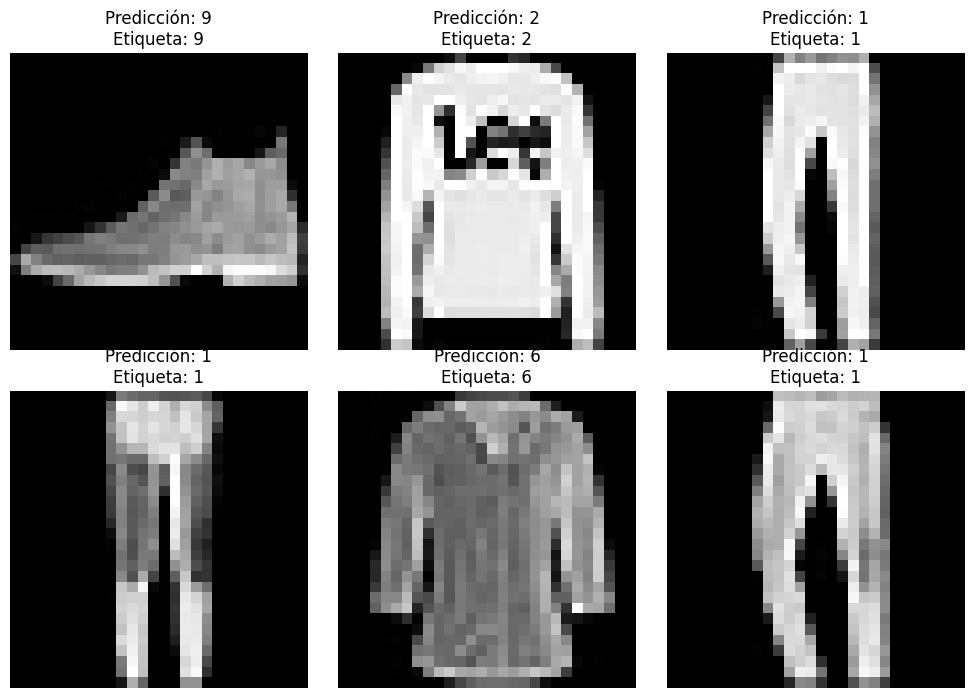

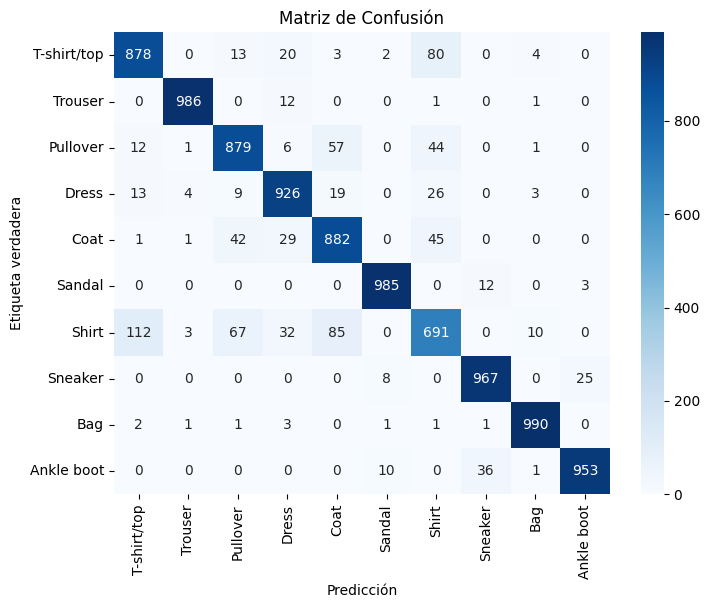

In [18]:
# 🔹 1. Evaluar el modelo en el conjunto de prueba
modelo.eval()  # Modo evaluación
correctos = 0
total = 0
predicciones_totales = []
etiquetas_totales = []

with torch.no_grad():
    for imagenes, etiquetas in test_loader:
        imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)
        salida = modelo(imagenes)
        _, predicciones = torch.max(salida, 1)
        
        # Contar aciertos
        correctos += (predicciones == etiquetas).sum().item()
        total += etiquetas.size(0)
        
        predicciones_totales.extend(predicciones.cpu().numpy())
        etiquetas_totales.extend(etiquetas.cpu().numpy())

precision_final = 100 * correctos / total
print(f"Precisión en test: {precision_final:.2f}%")

# 🔹 2. Graficar Pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.plot(historial_perdida, label="Pérdida en entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida durante el entrenamiento")
plt.legend()
plt.show()

# 🔹 3. Graficar Precisión de entrenamiento vs validación
plt.figure(figsize=(12, 5))
plt.plot(historial_precision, label="Precisión entrenamiento", color="blue")
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.title("Precisión de entrenamiento vs Validación")
plt.legend()
plt.show()

# 🔹 4. Mostrar predicciones en algunas imágenes de prueba
# Seleccionamos un batch del test set
imagenes, etiquetas = next(iter(test_loader))
imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)
salida = modelo(imagenes)
_, predicciones = torch.max(salida, 1)

# Mostrar las primeras 6 imágenes con su predicción
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(imagenes[i].cpu().numpy().squeeze(), cmap="gray")
    ax.set_title(f"Predicción: {predicciones[i].item()}\nEtiqueta: {etiquetas[i].item()}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# 🔹 5. Calcular y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_totales, predicciones_totales)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.classes, yticklabels=train_data.classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()


## Retos Opcionales
- Implementar técnicas de aumentación de datos
- Experimentar con diferentes arquitecturas
- Implementar early stopping
- Usar learning rate scheduling
- Realizar análisis de errores